# **Interview Questions on regression**





```
Me: What are the assumptions of a linear regression model?
You:
1. Linearity
2. Independance
3. Homoscedasticity
4. Normality of Residuals
5. No Multicollinearity
6. No Autocorrelation

Me: Ok, y = mx + c in this independent variable x, and dependent variable y should be linearly related.

Yes: And let's say
y = m1*x1 + m2*x2 + c
so in this x1 and x2 should be independent

Me: Yes, But how will you check independency
You: Ok, I think we can look at correlation matrix
```



**2. Independancy Check using Correlation on Iris Dataset**


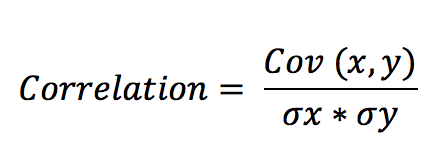
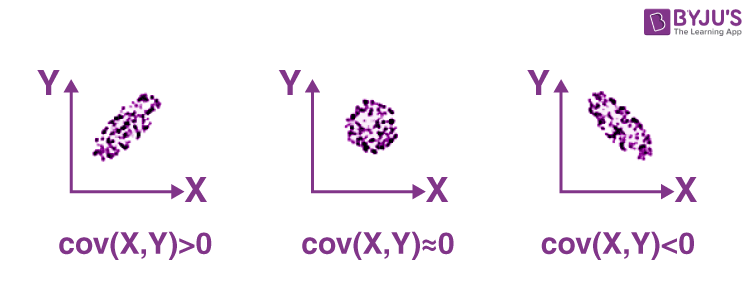
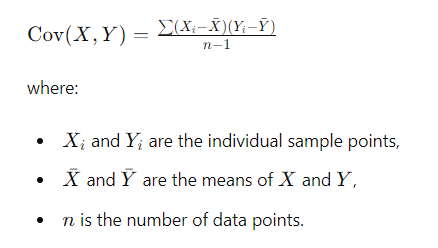

A positive corr value indicates a positive correlation, where the values of both variables tend to increase together.

In [ ]:
import pandas as pd

In [ ]:

# Load the dataset
df = pd.read_csv('/content/iris.data.csv', header=None)

# Replace the column names with actual ones
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns='Species', axis=1)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
corr = df.corr()

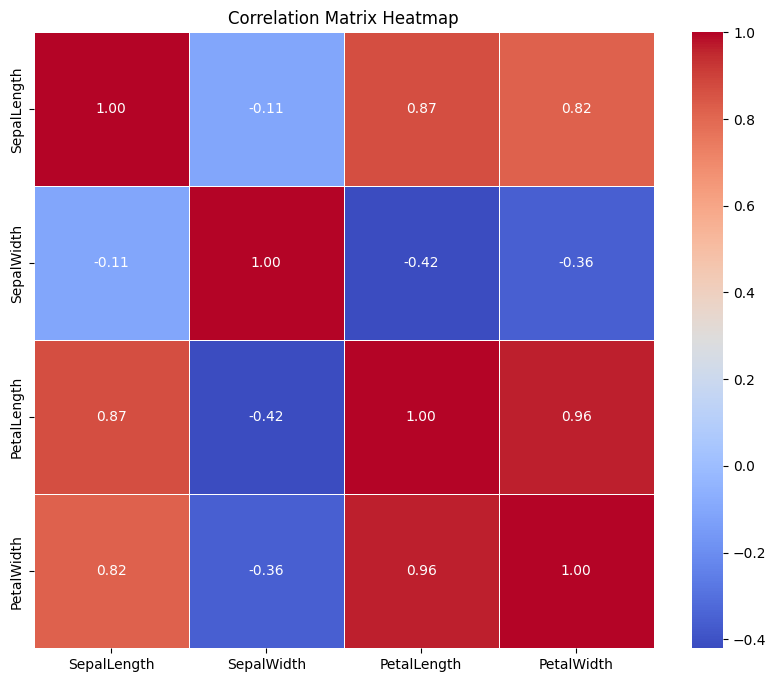

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'corr' is the correlation matrix
corr = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()




```

```





```
Me: As you can see from the heatmap of corr, it tells how strongly two variables are correlated and how if one increase then +ve corr value signify other also increase and vice verca.
You: And magnitude of corr implies strong dependencies between them.


Me: Yes
You: If it is so, then if we plot graph pair wise then they should show some trend, isn't ?

Me: Yes, let's see
```



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

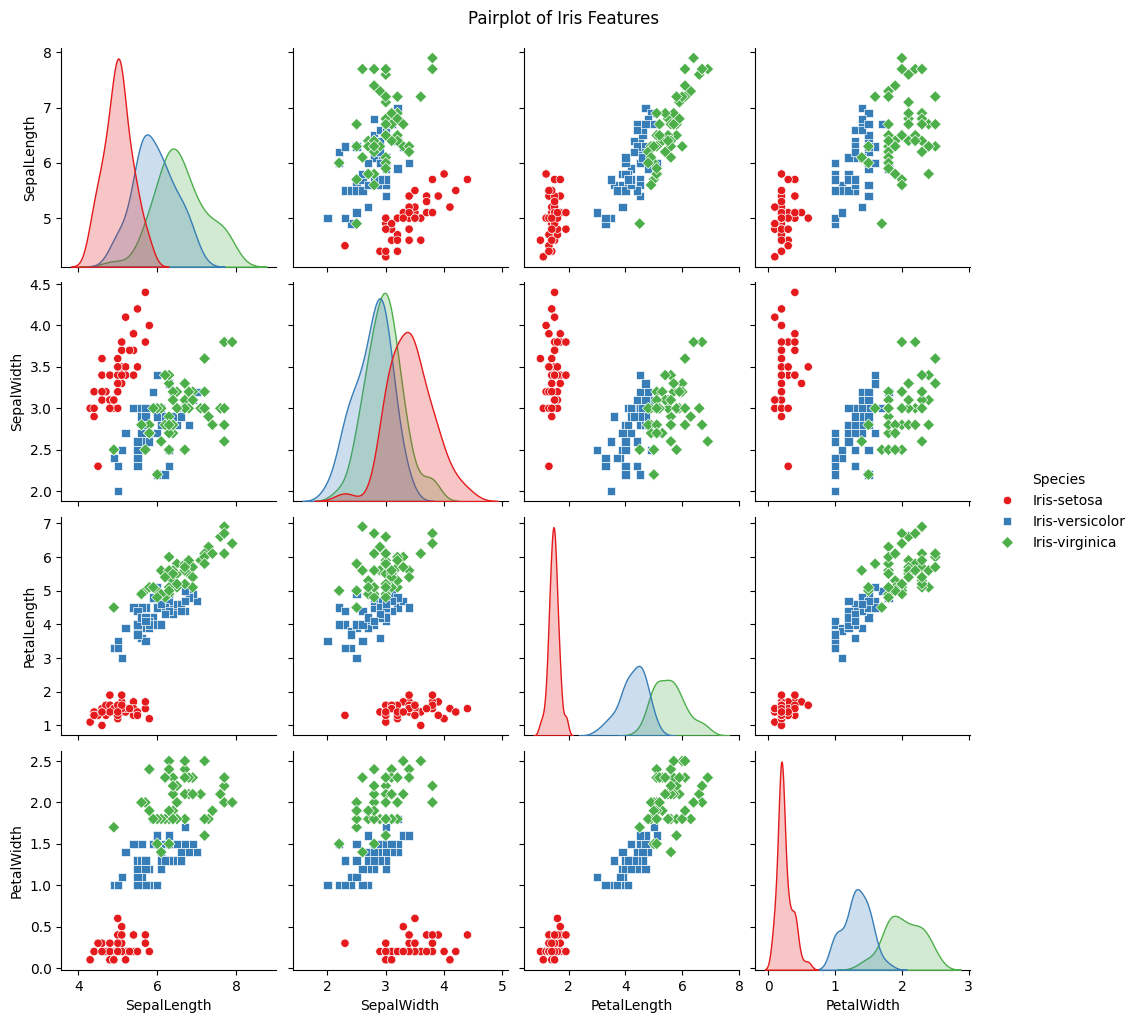

In [ ]:

# Load the dataset
df = pd.read_csv('/content/iris.data.csv', header=None)

# Replace the column names with actual ones
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

# Pairplot to show pairwise relationships
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette='Set1')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()




```
Me: let's have a look on outlier
You: Boxplot, actully it tells about first 25%, 50%, 75%
```



<ipython-input-41-111e05e79309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futu

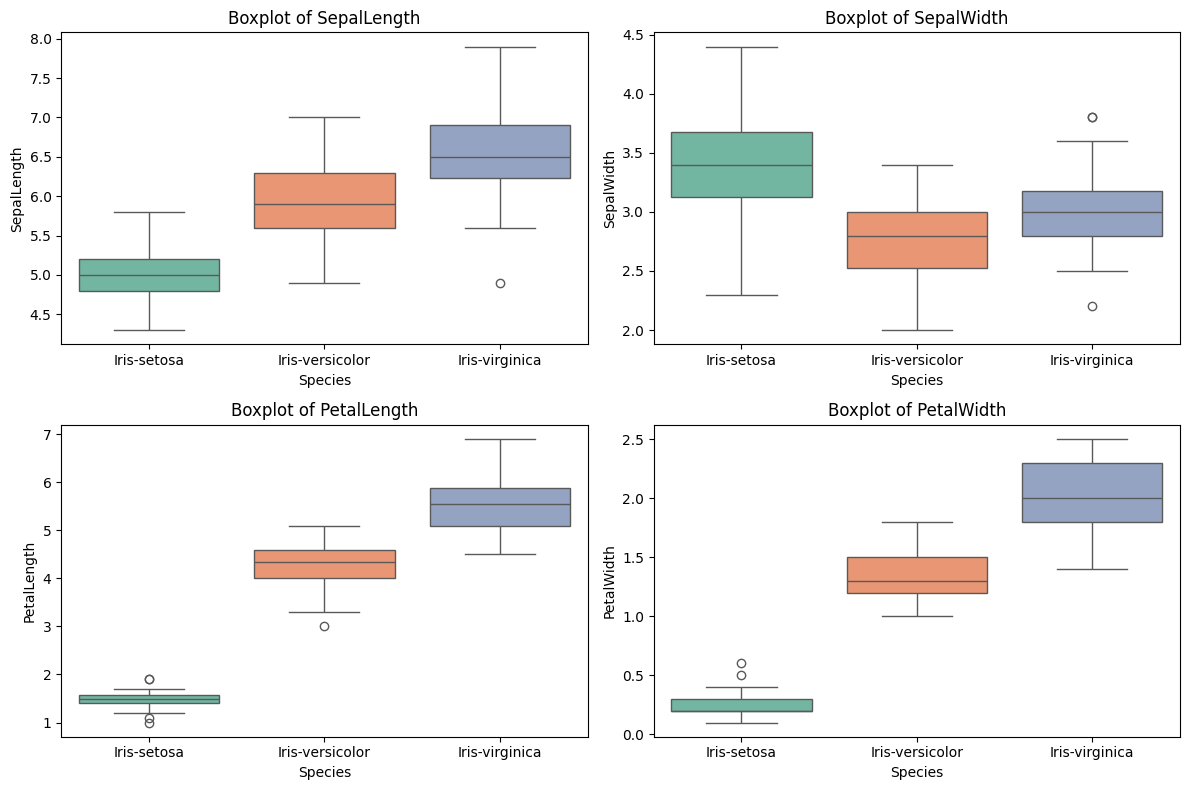

In [ ]:


# Box plots to show the distribution of each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Species'
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=column, data=df, palette='Set2')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()





```
Me: Now i think you have fair idea, that cov(x, y) and corr(x,y) will help to identify whether we can use linear regression or not
You: Yes, In above case linear regression is not good choice

Me: Yes
```



**3. Homoscedasticity**
In linear regression models, homoscedasticity is the assumption that the error term is the same across all values of the independent variables. The error term is the random disturbance in the relationship between the independent variables and the dependent variable.


**4. Normality of Residuals**
If the residuals follow the line closely, they are normally distributed. Significant deviations indicate non-normality.





**5. No Multicollinearity**
Multicollinearity is not applicable in this simple linear regression case since we have only one predictor. However, if there were multiple predictors, you could use the Variance Inflation Factor (VIF) to detect multicollinearity.

**6. No Autocorrelation**
We check the autocorrelation of residuals using the Durbin-Watson test.

The Durbin-Watson statistic should be close to 2, indicating no autocorrelation. Values less than 1 or greater than 3 suggest strong autocorrelation.

